In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import math

INTEGRACION-6

In [3]:
A = -0.01
B = 0.01
r = 0.5 


def fun(x):
    return (np.sqrt(B**2 -x**2))/(r+x)

def simson(f,a,b):
    return (np.abs(b-a)/3)*(f(a)+4*f((a+b)/2)+f(b))

real = np.pi*(r-np.sqrt(r**2-B**2))
Ereal = 0.005*real

error = 100
i = 5
while error>Ereal:
    x = np.linspace(A,B,i)
    valor = 0
    for j in range(len(x)-1):
        valor += simson(fun,x[j],x[j+1])
    valor = valor/2
    error = np.abs(valor-real)
    i+=1
"valor: "+str(round(valor,7))+", error: "+str(round(error/valor,4))+"%"

'valor: 0.0003127, error: 0.0047%'

INTEGRACION-7

C:\Users\a.parrao\AppData\Local\Temp\ipykernel_12848\823362428.py:5: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(r**2-x**2-y**2)


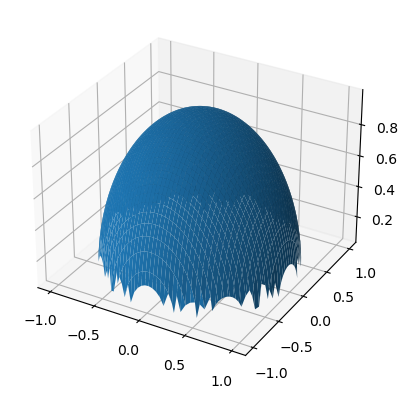

In [4]:
r = 1
n = 100
def circulo(x,y):
    
    z = np.sqrt(r**2-x**2-y**2)    
    
    return z

x = np.linspace(-1,1,n)
y = np.linspace(-1,1,n)
X, Y = np.meshgrid(x,y)
Z = circulo(X,Y)
  
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z)

INTEGRACION-10

INTEGRACION-17

In [6]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)


def GetLaguerre(n,x):
    
    L_0= sym.Number(1)    
    L_1= 1-x
    
    if n==0:
        
        pol= L_0
        
    elif n==1:
        
        pol= L_1
        
    else:
        
        k=n-1
        
        L_= GetLaguerre(k,x)
        L_1=GetLaguerre(k-1,x)
        
        pol= ((2*k+1-x)*L_-(k*L_1))/(k+1)

        
    return  sym.expand(pol,x)

def LaguerreDiff(Laguerre,x):

    return sym.diff(Laguerre,x,1)


#Función GetNewton del repositorio de la clase 

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn


def GetAllRootsGLag(n):
    
    x=sym.symbols('x')
    
    raices= np.array([])
    Laguerre= GetLaguerre(n,x) 
    Laguerredif= LaguerreDiff(Laguerre,x) 
    
   
    
    para=n+((n-1)*(n**(1/2)))
    
    xns = np.linspace(0,para,1000)
    
    for xn in xns:
           
        raiz=GetNewton( sym.lambdify(x,Laguerre,'numpy'),sym.lambdify(x,Laguerredif,'numpy'),xn)

        if  type(raiz)!=bool and not np.any(np.isclose(raices, raiz, atol=1e-4)):

            
            raices= np.append(raices, raiz)
            
    raices.sort()
    

    if len(raices) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
   
    return raices

def peso(n,x,p):

    a= (n+1)**2
    b=(sym.lambdify(p,GetLaguerre(n+1,p),'numpy')(x))**2
     
    return(x/(a*b))

def GetWeightsGLag(n):
    
    x=sym.symbols('x')
    raices= GetAllRootsGLag(n)
    pesos=np.array([])
    
    for i in range(n):
        pesos=np.append(pesos,peso(n,raices[i],x))
    
    return pesos


def GaussLaguerre(n,f):

    sum=0

    pesos= GetWeightsGLag(n)

    raices= GetAllRootsGLag(n)

    for i in range(n):

       sum+=(pesos[i]*f(raices[i]))

    return sum

def funcion_a_integrar(x):
    a=x**3
    b= 1-np.exp(-x)
    return a/b

GaussLaguerre(3,lambda x: funcion_a_integrar(x))

6.481130171540001

INTEGRACIÓN 18

In [9]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetHermite(n,x):

    H_0= sym.Number(1)    
    H_1= 2*x
    
    if n==0:
        
        pol= H_0
        
    elif n==1:
        
        pol= H_1
        
    else:
        
        k=n-1
        
        H_= GetHermite(k,x)
        H_d=sym.diff(H_,x,1)
        
        pol= ((2*x*H_)-H_d)
    
    return  sym.expand(pol,x)

def GetAllRootsGHer(n):
        
        x=sym.symbols('x')
        
        raices= np.array([])
        Hermite= GetHermite(n,x) 
        Hermitedif= LaguerreDiff(Hermite,x) 
        
    
        
        para=((4+n)**(1/2))

        
        xns = np.linspace((-1)*para,para,100)
        
        for xn in xns:
            
            raiz=GetNewton( sym.lambdify(x,Hermite,'numpy'),sym.lambdify(x,Hermitedif,'numpy'),xn)
            
            
    
            if  type(raiz)!=bool and not np.any(np.isclose(raices, raiz, atol=1e-3)):
    
                
                raices= np.append(raices, raiz)
                
        raices.sort()
        
        if len(raices) != n:
             ValueError('El número de raíces debe ser igual al n del polinomio.')
    
        return raices

def pesoH(n,x,p):

    a= 2**(n-1)
    b= math.factorial(n)
    c=((np.pi)**(1/2))
    d=n**2
    e= (sym.lambdify(p,GetHermite(n-1,p),'numpy')(x))**2
     
    return((a*b*c)/(d*e))

def GetWeightsGHer(n):
        
        x=sym.symbols('x')
        raices= GetAllRootsGHer(n)
        pesos=np.array([])
        
        for i in range(n):
            pesos=np.append(pesos,pesoH(n,raices[i],x))
        
        return pesos

def GaussHermite(n,f):
    
        sum=0
    
        pesos= GetWeightsGHer(n)
    
        raices= GetAllRootsGHer(n)
    
        for i in range(n):
    
            sum+=(pesos[i]*f(raices[i]))
    
        return sum

def funcion_onda(x):
    a=(1/(np.pi**(1/4)))
    b=GetHermite(1,(x/(2**(1/2))))
    return a*b

def posicion(x):
     psi= (np.abs(funcion_onda(x)))**2
     return psi*(x**2)

x=sym.Symbol('x',real=True)

print(GaussHermite(10,lambda x: posicion(x)))
print(GetHermite(20,x))
print(GetAllRootsGHer(20))


1.50000000000000
1048576*x**20 - 99614720*x**18 + 3810263040*x**16 - 76205260800*x**14 + 866834841600*x**12 - 5721109954560*x**10 + 21454162329600*x**8 - 42908324659200*x**6 + 40226554368000*x**4 - 13408851456000*x**2 + 670442572800
[-4.60368245 -3.94476404 -3.34785457 -2.78880606 -2.254974   -1.73853771
 -1.23407622 -0.73747373 -0.24534071  0.24534071  0.73747373  1.23407622
  1.73853771  2.254974    2.78880606  3.34785457  3.94476404  4.60368245]


INTEGRACION - 19

In [7]:
def f(x,t,deltaT):
    a = np.sqrt(x**2+deltaT**2)*300/(2*t)
    b = np.sqrt(x**2+deltaT**2)
    return np.tanh(a)/b

x = sym.Symbol('x',real=True)
def GetLegendreRecursive(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = x
    else:
        poly = ((2*n-1)*x*GetLegendreRecursive(n-1,x)-(n-1)*GetLegendreRecursive(n-2,x))/n
   
    return sym.expand(poly,x)

def GetDLegendre(n,x):
    Pn = GetLegendreRecursive(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGLeg(n):

    xn = np.linspace(-1,1,100)
    
    Legendre = []
    DLegendre = []
    
    for i in range(n+1):
        Legendre.append(GetLegendreRecursive(i,x))
        DLegendre.append(GetDLegendre(i,x))
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

def GetWeights(Roots,DLegendre):
    
    Dpoly = sym.lambdify([x],DLegendre[0],'numpy')
    Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)
    
    return Weights

poly = GetLegendreRecursive(50,x)
dpoly = [sym.diff(poly)]
raices,pesos = GetAllRootsGLeg(10),GetWeights(50,dpoly)
raices,pesos

KeyboardInterrupt: 